In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf


In [2]:
df = pd.read_csv('../data/TG_STAID002759.txt', header=14)
df.columns = df.columns.str.replace(' ', '')
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df.set_index(df['DATE'], inplace=True)
df['TG'] = df['TG'].replace({-9999 : np.nan })
df['temp'] = df['TG']
df = df[['temp']].copy() * .1
df.sort_index(inplace= True)

In [3]:
#create test df
df_test = df['2019-10':].copy()
#create train df
df_train = df[:'2019-09'].copy()

In [4]:
df_train['temp'] = df_train['temp'].fillna(df_train['temp'].mean())

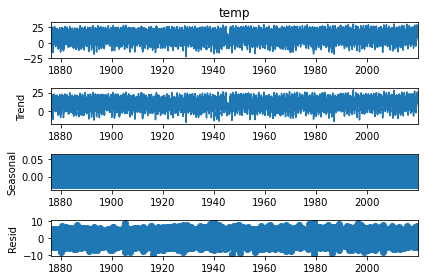

In [5]:
seasonal = seasonal_decompose(df_train['temp'].asfreq('d'))

seasonal.plot()
plt.show()


## https://docs.bokeh.org/en/latest/docs/gallery/unemployment.html

In [6]:
from math import pi

import pandas as pd

from bokeh.io import show
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.palettes import brewer

In [7]:
data = df

In [8]:
data = data.resample('m').mean()

In [9]:
data['temp'] = round(data['temp'], 2)

In [10]:
data['Year'] = data.index.year.astype(str)

In [11]:
data['Month'] = data.index.strftime('%B')
data.columns.name = 'Month'
data.head()

Month,temp,Year,Month
DATE,,,
1876-01-31,-2.07,1876,January
1876-02-29,2.39,1876,February
1876-03-31,4.96,1876,March
1876-04-30,9.83,1876,April
1876-05-31,10.27,1876,May


In [12]:
data['mean_for_this_month'] = data['temp'].groupby(data['Month']).transform('mean')
data['temp'] = data['temp'] - data['mean_for_this_month'] 
data.drop(['mean_for_this_month'], axis=1)

Month,temp,Year,Month
DATE,,,
1876-01-31,-2.054966,1876,January
1876-02-29,1.447103,1876,February
1876-03-31,0.789862,1876,March
1876-04-30,0.966069,1876,April
1876-05-31,-3.675417,1876,May
...,...,...,...
2020-05-31,-1.005417,2020,May
2020-06-30,2.182778,2020,June
2020-07-31,0.149236,2020,July


In [13]:
data.head()

Month,temp,Year,Month,mean_for_this_month
DATE,,,,
1876-01-31,-2.054966,1876,January,-0.015034
1876-02-29,1.447103,1876,February,0.942897
1876-03-31,0.789862,1876,March,4.170138
1876-04-30,0.966069,1876,April,8.863931
1876-05-31,-3.675417,1876,May,13.945417


In [14]:
data = data.pivot(index='Year', columns='Month', values='temp')

In [15]:
years = list(data.index)
months = list(data.columns)

# reshape to 1D array or rates with a month and year for each row.
df = pd.DataFrame(data.stack(), columns=['temp']).reset_index()

In [16]:
df.columns = ['Year', 'Month', 'temp']

In [17]:
colors = brewer['RdBu'][11]
mapper = LinearColorMapper(palette=colors, low=df.temp.min(), high=df.temp.max(), nan_color='#a9a9a9')

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

In [18]:
p = figure(title="Temperatures in Berlin ({0} - {1})".format(years[0], years[-1]),
           x_range=years, y_range=list(reversed(months)),
           x_axis_location="above", plot_width=1400, plot_height=800,
           tools=TOOLS, toolbar_location='below',
           tooltips=[('date', '@Month @Year'), ('temp', '@temp °C')])

In [19]:
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "7px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

In [20]:
p.rect(x="Year", y="Month", width=1, height=1,
       source=df,
       fill_color={'field': 'temp', 'transform': mapper},
       line_color=None)

GlyphRenderer(id='1037', ...)

In [21]:
color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="7px",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%f"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
p.add_layout(color_bar, 'right')

In [22]:
show(p)      # show the plot